# Data Vizualization/Project Description

This project is an attempt to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. 

In [233]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [234]:
data = pd.read_csv("https://raw.githubusercontent.com/dszabo236/cs4774Assigments/main/healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [235]:
data = data.drop("id",axis=1)
data.describe

<bound method NDFrame.describe of       gender   age  hypertension  ...   bmi   smoking_status stroke
0       Male  67.0             0  ...  36.6  formerly smoked      1
1     Female  61.0             0  ...   NaN     never smoked      1
2       Male  80.0             0  ...  32.5     never smoked      1
3     Female  49.0             0  ...  34.4           smokes      1
4     Female  79.0             1  ...  24.0     never smoked      1
...      ...   ...           ...  ...   ...              ...    ...
5105  Female  80.0             1  ...   NaN     never smoked      0
5106  Female  81.0             0  ...  40.0     never smoked      0
5107  Female  35.0             0  ...  30.6     never smoked      0
5108    Male  51.0             0  ...  25.6  formerly smoked      0
5109  Female  44.0             0  ...  26.2          Unknown      0

[5110 rows x 11 columns]>

In [236]:
# Remove rows where smoker status is unknown and gender is other
data = data[data['smoking_status']!='Unknown']
data = data[data["gender"] != 'Other']

In [237]:
data["stroke"].value_counts()

0    3363
1     202
Name: stroke, dtype: int64

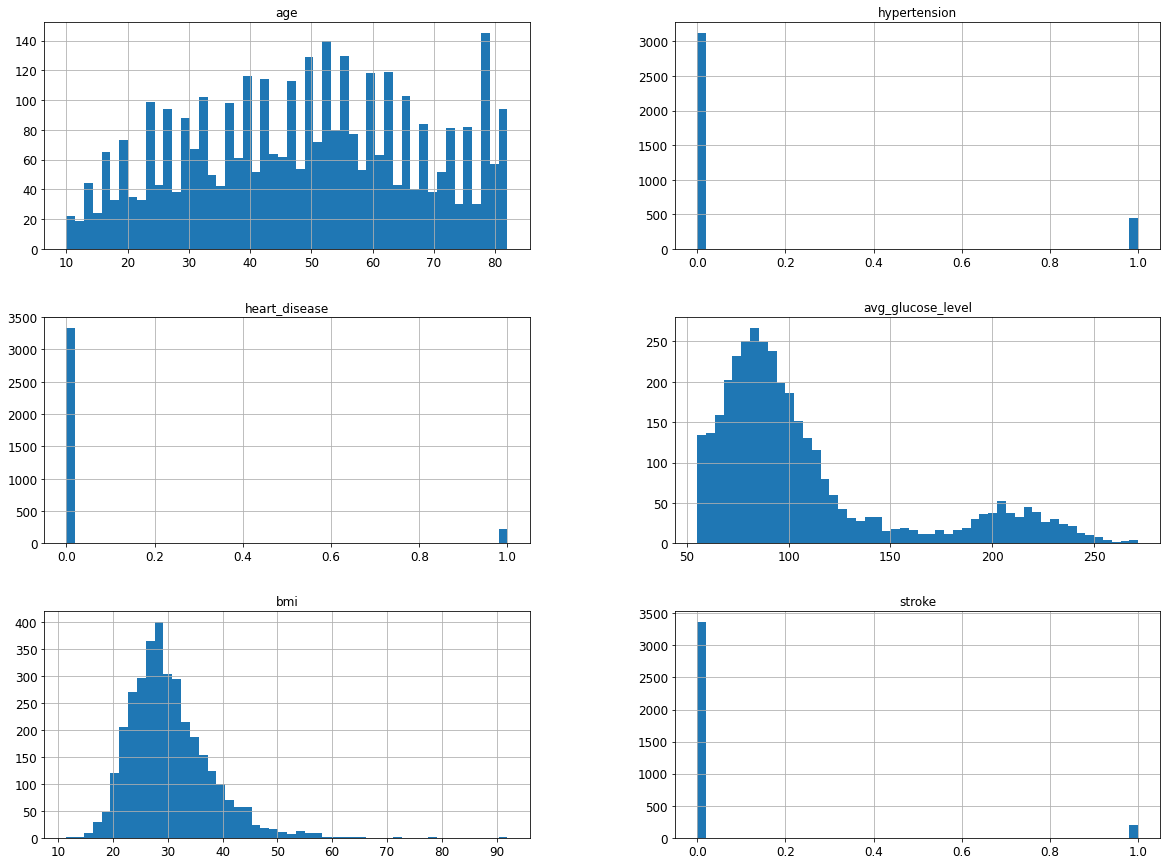

In [238]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [239]:
# Use corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset
corr_matrix = data.corr()
corr_matrix.shape
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.250765
hypertension         0.134695
heart_disease        0.129330
avg_glucose_level    0.128773
bmi                  0.011601
Name: stroke, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e23eef310>,
      dtype=object)

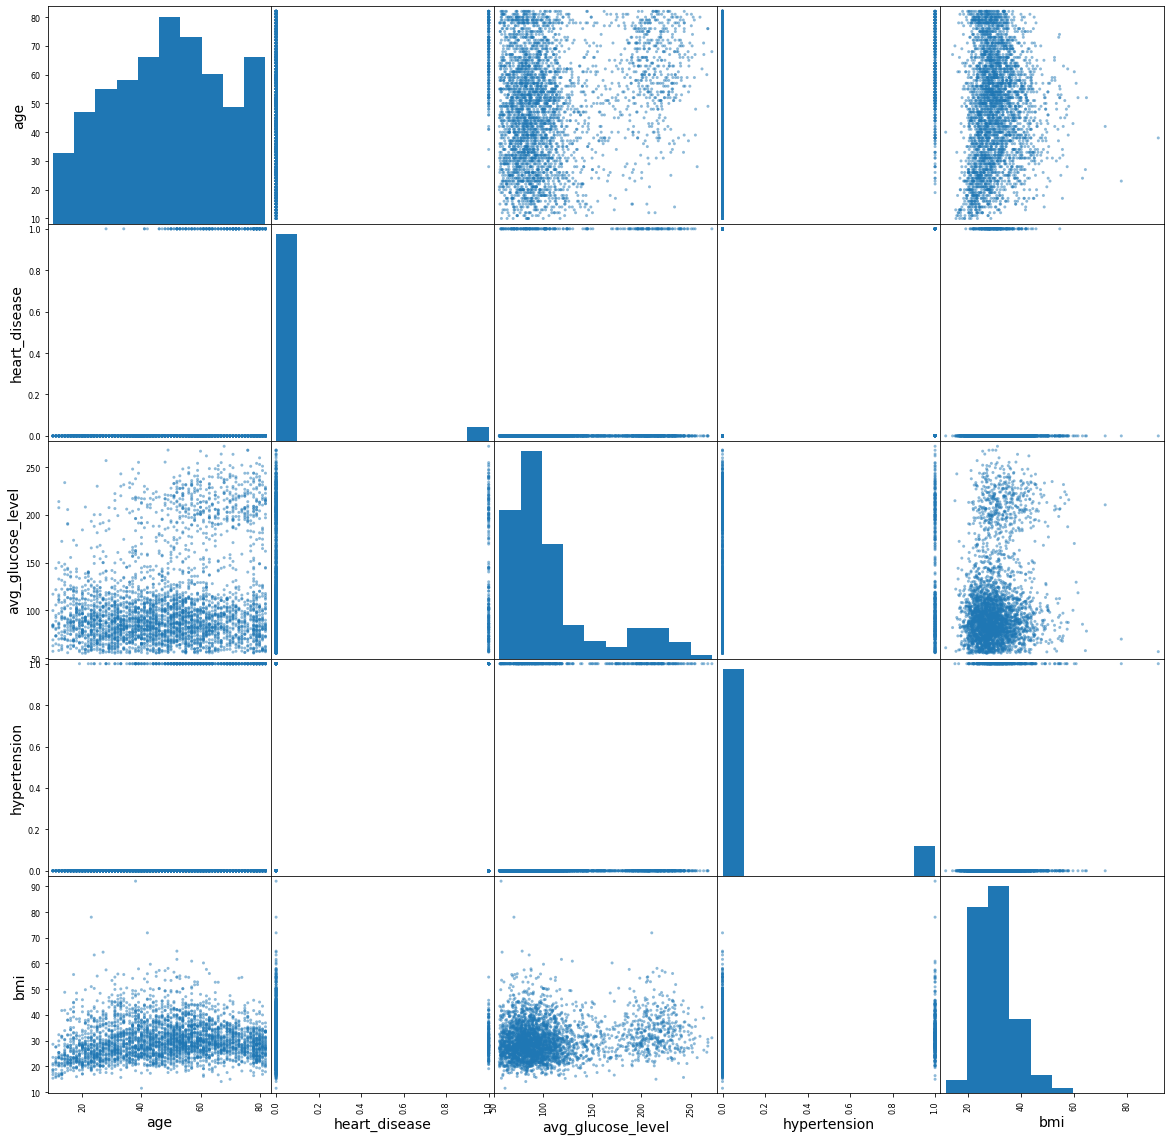

In [240]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["age", "heart_disease", "avg_glucose_level",
              "hypertension", "bmi"]
scatter_matrix(data[attributes], figsize=(20, 20))

# Data Cleaning

In [241]:
X, y = data.drop("stroke",axis=1), data["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test)

      gender   age  hypertension  ...  avg_glucose_level   bmi   smoking_status
1273  Female  46.0             0  ...             127.75  30.5     never smoked
3874    Male  26.0             0  ...              71.25  30.3           smokes
2686    Male  54.0             0  ...             227.74  33.4           smokes
2833  Female  41.0             0  ...              78.74  42.3           smokes
3180  Female  24.0             0  ...             104.86  19.8     never smoked
...      ...   ...           ...  ...                ...   ...              ...
3446  Female  21.0             0  ...              88.51  20.5     never smoked
889     Male  62.0             0  ...              56.31  24.3  formerly smoked
3271    Male  36.0             0  ...              74.63  31.6  formerly smoked
3901    Male  46.0             0  ...             159.67  37.3     never smoked
878     Male  26.0             0  ...             103.61  31.4     never smoked

[713 rows x 10 columns]


In [242]:
print(X_test.shape)
print(X_train.shape)

(713, 10)
(2852, 10)


In [243]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
637,Female,56.0,0,0,Yes,Private,Rural,112.43,54.6,never smoked
2201,Female,69.0,0,1,Yes,Private,Urban,196.33,25.3,never smoked
3378,Male,51.0,0,0,No,Self-employed,Rural,219.17,29.8,never smoked
1544,Female,55.0,0,0,Yes,Private,Rural,87.78,25.2,formerly smoked
1934,Male,57.0,0,0,Yes,Private,Rural,89.81,35.6,never smoked
...,...,...,...,...,...,...,...,...,...,...
1568,Female,65.0,0,0,Yes,Private,Urban,72.49,28.9,smokes
1801,Male,60.0,0,0,No,Private,Urban,84.14,32.3,never smoked
1177,Male,23.0,0,0,No,Private,Urban,115.98,22.3,never smoked
5021,Female,35.0,0,0,Yes,Private,Urban,81.90,24.5,never smoked


In [244]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1273,Female,46.0,0,0,Yes,Private,Urban,127.75,30.5,never smoked
3874,Male,26.0,0,0,No,Private,Urban,71.25,30.3,smokes
2686,Male,54.0,0,0,Yes,Private,Rural,227.74,33.4,smokes
2833,Female,41.0,0,0,Yes,Private,Urban,78.74,42.3,smokes
3180,Female,24.0,0,0,No,Govt_job,Urban,104.86,19.8,never smoked
...,...,...,...,...,...,...,...,...,...,...
3446,Female,21.0,0,0,No,Private,Urban,88.51,20.5,never smoked
889,Male,62.0,0,1,Yes,Self-employed,Urban,56.31,24.3,formerly smoked
3271,Male,36.0,0,0,Yes,Private,Rural,74.63,31.6,formerly smoked
3901,Male,46.0,0,0,No,Private,Urban,159.67,37.3,never smoked


In [245]:
y_test.value_counts()

0    663
1     50
Name: stroke, dtype: int64

In [246]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

cat_attribs = ["hypertension", "heart_disease", "smoking_status","gender", "work_type","Residence_type","ever_married"]
data_num = X.drop(cat_attribs, axis=1)
num_attribs = list(data_num)
print(num_attribs)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
X_train_prepared

['age', 'avg_glucose_level', 'bmi']


array([[ 0.3727745 ,  0.07107565,  3.43348438, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.05881577,  1.81034629, -0.69117675, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.10891247,  2.28382592, -0.05769637, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.36871487,  0.14466815, -1.113497  , ...,  1.        ,
         1.        ,  0.        ],
       [-0.73544601, -0.56181986, -0.80379548, ...,  1.        ,
         0.        ,  1.        ],
       [-0.36603917, -0.47060662, -1.42319852, ...,  1.        ,
         0.        ,  1.        ]])

# Models

In [247]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier

#https://towardsdatascience.com/model-evaluation-techniques-for-classification-models-eac30092c38b
def Model(model):
    model.fit(X_train_prepared,y_train)
    score = model.score(X_test_prepared, y_test)
    model_train_score = model.score(X_train_prepared, y_train)
    model_test_score = model.score(X_test_prepared, y_test)
    prediction = model.predict(X_test_prepared)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    plot_confusion_matrix(model,X_test_prepared,y_test,cmap="OrRd")

Testing Score 
 0.9298737727910238


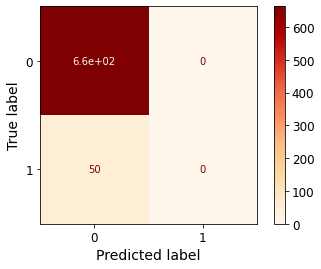

In [248]:
# Logistic Regression
lg_reg=LogisticRegression()
Model(lg_reg)

Testing Score 
 0.8920056100981767


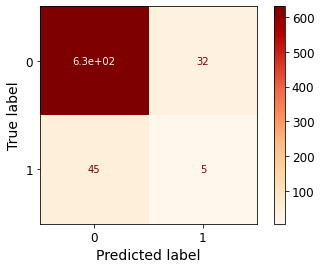

In [249]:
# Decision Tree Classification
d_classif= DecisionTreeClassifier()
Model(d_classif)

Testing Score 
 0.9298737727910238


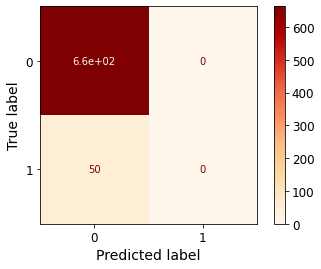

In [250]:
# Random Classifier 
rf = RandomForestClassifier()
Model(rf)

Testing Score 
 0.9298737727910238


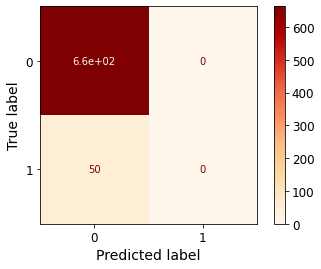

In [251]:
# XGB classifier
xg = XGBClassifier()
Model(xg)

Testing Score 
 0.9270687237026648


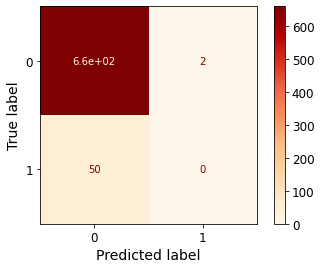

In [252]:
ad = AdaBoostClassifier(n_estimators = 50)
Model(ad)

In [253]:
rf = RandomForestClassifier()
rf.fit(X_train_prepared, y_train)
xg = XGBClassifier()
xg.fit(X_train_prepared, y_train)
ad = AdaBoostClassifier(n_estimators = 50)
ad.fit(X_train_prepared, y_train)

from sklearn.metrics import classification_report as cr
from sklearn.metrics import accuracy_score as As
print("XGB Model")
print(cr(y_test,xg.predict(X_test_prepared)))
print("Ada Boost Model")
print(cr(y_test,ad.predict(X_test_prepared)))
print("Random Forest Model")
print(cr(y_test,rf.predict(X_test_prepared)))

XGB Model
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       663
           1       0.00      0.00      0.00        50

    accuracy                           0.93       713
   macro avg       0.46      0.50      0.48       713
weighted avg       0.86      0.93      0.90       713

Ada Boost Model
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       663
           1       0.00      0.00      0.00        50

    accuracy                           0.93       713
   macro avg       0.46      0.50      0.48       713
weighted avg       0.86      0.93      0.89       713

Random Forest Model
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       663
           1       0.33      0.02      0.04        50

    accuracy                           0.93       713
   macro avg       0.63      0.51      0.50       713
weighted avg       0.89     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [254]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt

model = Sequential()
# add first hidden layer with input dim
model.add(Dense(units = 32, activation='relu', kernel_initializer = 'he_uniform', input_dim = 21))
model.add(Dense(units = 16, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# train the model
model.fit(X_train_prepared, y_train, batch_size = 20, epochs = 50, verbose = 1)

Epoch 1/50
143/143 [==============================] - 1s 1ms/step - loss: 0.7394 - accuracy: 0.5130
Epoch 2/50
143/143 [==============================] - 0s 2ms/step - loss: 0.1863 - accuracy: 0.9473
Epoch 3/50
143/143 [==============================] - 0s 2ms/step - loss: 0.1656 - accuracy: 0.9518
Epoch 4/50
143/143 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.9458
Epoch 5/50
143/143 [==============================] - 0s 1ms/step - loss: 0.1740 - accuracy: 0.9436
Epoch 6/50
143/143 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9505
Epoch 7/50
143/143 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9414
Epoch 8/50
143/143 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9521
Epoch 9/50
143/143 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9505
Epoch 10/50
143/143 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9404

In [260]:
acc = model.evaluate(X_test_prepared, y_test)
acc

23/23 [==============================] - 0s 1ms/step - loss: 0.2870 - accuracy: 0.9229


[0.2869774103164673, 0.9228611588478088]

In [256]:
predictions = model.predict(X_test_prepared)
predictions = predictions > 0.5

In [257]:
cm = confusion_matrix(predictions, y_test)
cm

array([[657,  50],
       [  6,   0]])

In [258]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

       False       0.99      0.93      0.96       707
        True       0.00      0.00      0.00         6

    accuracy                           0.92       713
   macro avg       0.50      0.46      0.48       713
weighted avg       0.98      0.92      0.95       713



# Conclusion/Remarks

We can see that none of the models did terribly well on our data. Accuracy got pretty high, but it tended to mis-classify most of the prediction data. Overall, with so few labels, they all did a relatively good job. 